In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
water_dt = pd.read_csv('water.csv')

In [4]:
water_dt.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [9]:
water_dt.shape

(61, 5)

In [ ]:
"""
Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?
"""

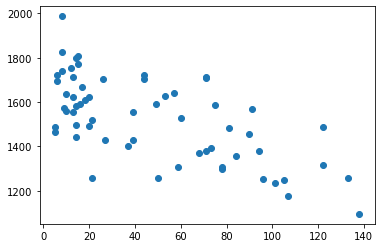

In [14]:
#Построить точечный график
#Визуально есть небольшая обратная зависимость
plt.scatter(water_dt.hardness, water_dt.mortality)

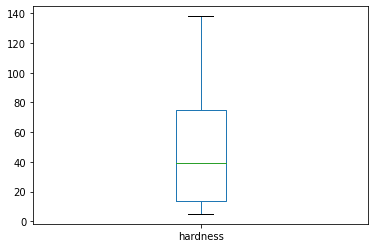

In [27]:
water_dt['hardness'].plot(kind='box')

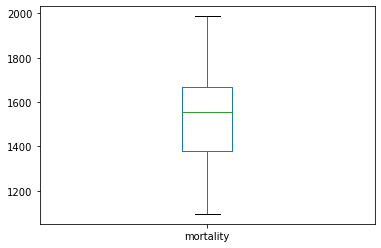

In [28]:
water_dt['mortality'].plot(kind='box')

In [ ]:
#Выбросов нет - можно использовать коэффициент корреляции Пирсона

In [29]:
#Рассчитать коэффициенты корреляции Пирсона и Спирмена
#обратная зависимость подтверждается
print('Корреляция Пирсона\n', water_dt[['hardness', 'mortality']].corr())
print('\nКорреляция Cпирмана\n',water_dt[['hardness', 'mortality']].corr(method = 'spearman'))

Корреляция Пирсона
            hardness  mortality
hardness   1.000000  -0.654849
mortality -0.654849   1.000000

Корреляция Cпирмана
            hardness  mortality
hardness   1.000000  -0.631665
mortality -0.631665   1.000000


In [34]:
#Построить модель линейной регрессии
x=water_dt[['hardness']]
y=water_dt['mortality']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [47]:
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [48]:
model.coef_

array([-3.13167087])

In [38]:
model.intercept_
#модель Y=-3.13167087 * X + 1668.9722977277095

1668.9722977277095

In [39]:
y_pred = model.predict(x_test)

In [42]:
#Рассчитать коэффициент детерминации
print('коэффициент детерминации=',model.score(x_test,y_test))

коэффициент детерминации= 0.5046490611017092


In [43]:
#Вывести график остатков
y_err = y_pred - y_test

In [53]:
type(y_err)

pandas.core.series.Series

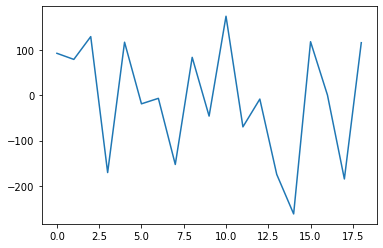

In [62]:
plt.plot(range(y_err.shape[0]), y_err)
#остатки распр случайно

In [ ]:
#Ответ - взаимосвязь есть. Связь обратная, уровень взаимосвязи средний. 

In [64]:
"""
Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности
"""

'\nСохраняется ли аналогичная зависимость для северных и южных городов по отдельности?\n\nРазделить данные на 2 группы\nПовторить аналогичные шаги из пункта 1 для каждой группы по отдельности\n'

In [66]:
water_dt_nrth = water_dt[water_dt['location'] == 'North']
water_dt_sth = water_dt[water_dt['location'] == 'South']

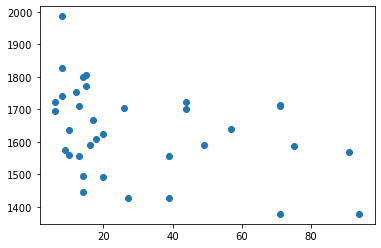

In [68]:
plt.scatter(water_dt_nrth.hardness, water_dt_nrth.mortality)
#Видим слабую обратную зависомость

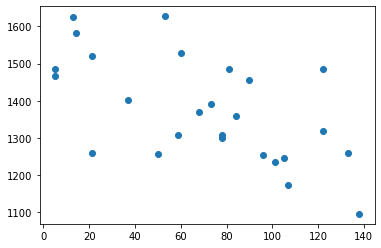

In [69]:
plt.scatter(water_dt_sth.hardness, water_dt_sth.mortality)
#Видим слабую обратную зависомость

In [70]:
print('Корреляция Пирсона, регион = Север\n', water_dt_nrth[['hardness', 'mortality']].corr())
print('\nКорреляция Cпирмана, регион = Север\n',water_dt_nrth[['hardness', 'mortality']].corr(method = 'spearman'))
print('\nКорреляция Пирсона, регион = Юг\n', water_dt_sth[['hardness', 'mortality']].corr())
print('\nКорреляция Cпирмана, регион = Юг\n',water_dt_sth[['hardness', 'mortality']].corr(method = 'spearman'))
#Для регионов Юга зависимость более сильная

Корреляция Пирсона, регион = Север
            hardness  mortality
hardness   1.000000  -0.368598
mortality -0.368598   1.000000

Корреляция Cпирмана, регион = Север
            hardness  mortality
hardness   1.000000  -0.404208
mortality -0.404208   1.000000

Корреляция Пирсона, регион = Юг
            hardness  mortality
hardness   1.000000  -0.602153
mortality -0.602153   1.000000

Корреляция Cпирмана, регион = Юг
            hardness  mortality
hardness   1.000000  -0.595723
mortality -0.595723   1.000000


In [71]:
x_n=water_dt_nrth[['hardness']]
y_n=water_dt_nrth['mortality']
x_s=water_dt_sth[['hardness']]
y_s=water_dt_sth['mortality']

x_train_n, x_test_n, y_train_n, y_test_n = train_test_split(x_n, y_n, test_size=0.30, random_state=42)
x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(x_s, y_s, test_size=0.30, random_state=42)

model_n=LinearRegression()
model_n.fit(x_train_n, y_train_n)
model_s=LinearRegression()
model_s.fit(x_train_s, y_train_s)

LinearRegression()

In [75]:
print(f'Модель для региона=Север: Y={model_n.coef_[0]}*X+{model_n.intercept_}')
print(f'Модель для региона=Юг: Y={model_s.coef_[0]}*X+{model_s.intercept_}')

Модель для региона=Север: Y=-1.9768622600638235*X+1688.150229031281
Модель для региона=Юг: Y=-3.513429212378229*X+1640.2204603423374


In [79]:
y_pred_n= model_n.predict(x_test_n)
y_pred_s= model_s.predict(x_test_s)
#Рассчитать коэффициент детерминации
print('коэффициент детерминации для региона=Север:',model_n.score(x_test_n,y_test_n))
print('коэффициент детерминации для региона=Юг:',model_s.score(x_test_s,y_test_s))
print('коэффициент детерминации:',model.score(x_test,y_test))
#модели по регоинам работают плохо.

коэффициент детерминации для региона=Север: 0.018885304285745863
коэффициент детерминации для региона=Юг: -2.551922301235205
коэффициент детерминации: 0.5046490611017092


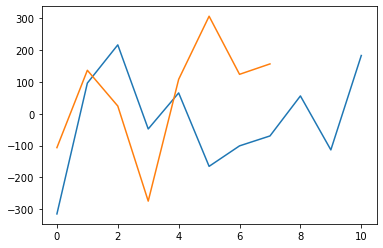

In [82]:
#Вывести график остатков
y_err_n = y_pred_n - y_test_n
y_err_s = y_pred_s - y_test_s
plt.plot(range(y_err_n.shape[0]), y_err_n)
plt.plot(range(y_err_s.shape[0]), y_err_s)
#остатки распр случайно

In [ ]:
#зависимость сохраняется, но модели низкого качества